210157A Epa Y. R. A. Github Link - https://github.com/yaseemarusiru/Image_Processing_and_Machine_Vision

Question 1

Radius 20.0
Center (282.0, 359.0)


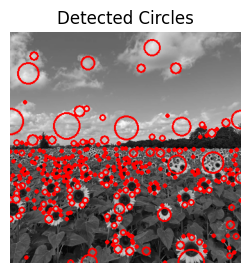

In [49]:
import cv2 as cv;import numpy as np;from skimage.feature import blob_log;from math import sqrt;import matplotlib.pyplot as plt
image = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4); gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) ;gray_3 = cv.merge([gray, gray, gray])
# Laplacian of Gaussians
blobs = blob_log(cv.GaussianBlur(gray, (9, 9), 0.1), min_sigma=2,max_sigma=20, threshold=0.1)
y, x, r = blobs[np.argmax(blobs[:, 2] * sqrt(2))]
print(f"Radius {r}") ;print(f"Center ({x}, {y})")
for blob in blobs:
    y, x, r = blob  # Blob format 
    cv.circle(gray_3, (int(x), int(y)), int(r), (0,0,255), 2) 
plt.figure(figsize=(3,3));plt.imshow(cv.cvtColor(gray_3, cv.COLOR_BGR2RGB));plt.title('Detected Circles');plt.axis('off') ;plt.show()

Question 2

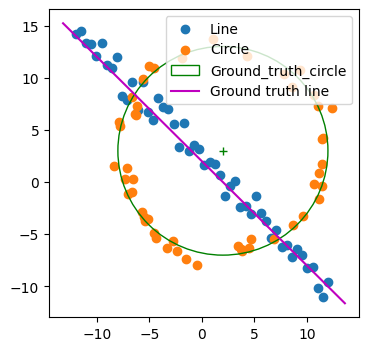

In [50]:
import numpy as np;from scipy . optimize import minimize;import matplotlib . pyplot as plt;np.random.seed(0)
N = 100;half_n = N//2;r = 10
x0_gt , y0_gt = 2 , 3 # Center
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = x0_gt + ( r + n)*np . cos ( t ) , y0_gt + ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
s = 1.0 ; m, b = -1, 2
x = np . linspace (-12, 12 , half_n ); y = m*x + b + s*np . random . randn ( half_n )
X_line = np.hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np.vstack((X_circ , X_line ) ) # A l l p o in t s
fig , ax = plt . subplots (1 ,1 , figsize =(4,4))
ax . scatter(X_line[ : , 0 ] , X_line [ : , 1 ] , label= 'Line');ax . scatter(X_circ[ : , 0 ] , X_circ [ : , 1 ] , label= 'Circle')
circle_gt = plt . Circle ( ( x0_gt , y0_gt ) , r , color= 'g' , fill =False , label= 'Ground_truth_circle' )
ax.add_patch( circle_gt);ax.plot((x0_gt) , (y0_gt) , '+' , color= 'g' )
x_min , x_max = ax.get_xlim()
x_ = np.array([x_min,x_max]);y_ = m*x_ + b
plt.plot(x_,y_,color= 'm',label= 'Ground truth line');plt.legend();plt.show()

part (a)

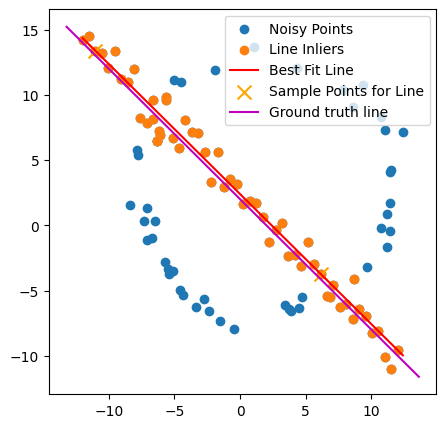

Estimated line in normal form: 0.71 * x + 0.71 * y = 1.69


In [51]:
import numpy as np;import matplotlib.pyplot as plt
# Fit the line using RANSAC
num_iterations=100;distance_threshold=1.8;consensus_threshold = 35;best_inliers = []
for _ in range(num_iterations):
    sample_points = X[np.random.choice(X.shape[0], 2, replace=False)]
    a, b = -sample_points[1, 1] + sample_points[0, 1], sample_points[1, 0] - sample_points[0, 0]  # Normal to the line
    norm = np.sqrt(a**2 + b**2) ;a, b = a / norm, b / norm ;d = a * sample_points[0, 0] + b * sample_points[0, 1]
    distances = np.abs(a * X[:, 0] + b * X[:, 1] - d) ; inliers = X[distances < distance_threshold]
    
    if len(inliers) > len(best_inliers) and len(inliers) > consensus_threshold :
        best_inliers = inliers ;best_line = (a, b, d) ;best_sample_points_line = sample_points

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:, 0], X[:, 1],  label='Noisy Points');ax.scatter(best_inliers[:, 0], best_inliers[:, 1], label='Line Inliers')
a, b, d = best_line; x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100) ;y_vals = (d - a * x_vals) / b
ax.plot(x_vals, y_vals, 'r-', label='Best Fit Line')
ax.scatter(best_sample_points_line[:, 0], best_sample_points_line[:, 1], color='orange', s=100, marker='x', label='Sample Points for Line')
# Ground truth line
plt.plot(x_,y_,color= 'm',label= 'Ground truth line');plt.legend();plt.show();print(f"Estimated line in normal form: {a:.2f} * x + {b:.2f} * y = {d:.2f}")

part (b)

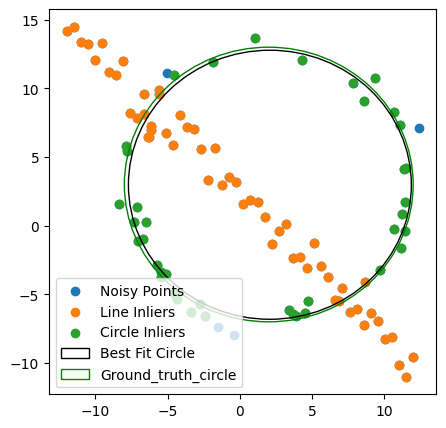

Best-fit circle equation: (x - 1.73)^2 + (y - 4.96)^2 = 91.28


In [52]:
from scipy.optimize import minimize
distance_threshold_circle=1.0; consensus_threshold_circle=30; remnant_points = X[~np.isin(X, best_inliers).all(axis=1)]; circle_inliers = []

for _ in range(num_iterations):
    sample_points = remnant_points[np.random.choice(remnant_points.shape[0], 3, replace=False)]
    def calc_circle(params):
        x0, y0, r = params
        return np.sum((np.sqrt((sample_points[:, 0] - x0)**2 + (sample_points[:, 1] - y0)**2) - r)**2)
    x_center = np.mean(sample_points[:, 0]) ; y_center = np.mean(sample_points[:, 1])
    radius_guess = np.mean(np.sqrt((sample_points[:, 0] - x_center)**2 + (sample_points[:, 1] - y_center)**2))
    x0_opt, y0_opt, r_opt = minimize(calc_circle, x0=[x_center, y_center, radius_guess], method='BFGS').x
    distances = np.abs(np.sqrt((remnant_points[:, 0] - x0_opt)**2 + (remnant_points[:, 1] - y0_opt)**2) - r_opt)
    inliers = remnant_points[distances < distance_threshold_circle]
    if (len(inliers) > len(circle_inliers)) and (len(inliers) > consensus_threshold_circle) :
        circle_inliers = inliers ; best_circle = (x0_opt, y0_opt, r_opt) ; best_sample_points_circle = sample_points
# Plot the best fit circle
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:, 0], X[:, 1], label='Noisy Points')
ax.scatter(best_inliers[:, 0], best_inliers[:, 1], label='Line Inliers')
ax.scatter(circle_inliers[:, 0], circle_inliers[:, 1], label='Circle Inliers')
circle = plt.Circle((best_circle[0], best_circle[1]), best_circle[2], fill=False, label='Best Fit Circle')
ax.add_patch(circle)
circle_gt = plt.Circle((x0_gt , y0_gt ) , r , color= 'g' , fill =False , label= 'Ground_truth_circle' )
ax.add_patch( circle_gt);plt.legend();plt.show()
print(f"Best-fit circle equation: (x - {x0_opt:.2f})^2 + (y - {y0_opt:.2f})^2 = {r_opt**2:.2f}")

part (c)

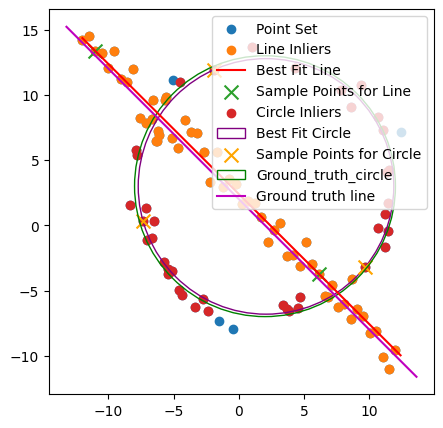

In [53]:
fig, ax = plt.subplots(figsize=(5,5)); ax.scatter(X[:, 0], X[:, 1], label='Point Set')
ax.scatter(best_inliers[:, 0], best_inliers[:, 1], label='Line Inliers'); a, b, d = best_line
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100); y_vals = (d - a * x_vals) / b
ax.plot(x_vals, y_vals, 'r-', label='Best Fit Line')
ax.scatter(best_sample_points_line[:, 0], best_sample_points_line[:, 1], s=100, marker='x', label='Sample Points for Line')
ax.scatter(circle_inliers[:, 0], circle_inliers[:, 1], label='Circle Inliers')
circle_ransac = plt.Circle((best_circle[0], best_circle[1]), best_circle[2], fill=False, label='Best Fit Circle', color='purple')
ax.add_patch(circle_ransac)
ax.scatter(best_sample_points_circle[:, 0], best_sample_points_circle[:, 1], color='orange', s=100, marker='x', label='Sample Points for Circle')
circle_gt = plt . Circle ( ( x0_gt , y0_gt ) , r , color= 'g' , fill =False , label= 'Ground_truth_circle' )
ax.add_patch( circle_gt); plt.plot(x_,y_,color= 'm',label= 'Ground truth line')
ax.set_aspect('equal'); plt.legend(); plt.show()

part (d)

If we fit the circle first, both points belonging to the circle and the line will be considered when estimating the circle. This will make the circle estimation incorrect. Also, it will affec the line estimation because now some points belonging to the line has been used as circle inliers.

Question 3

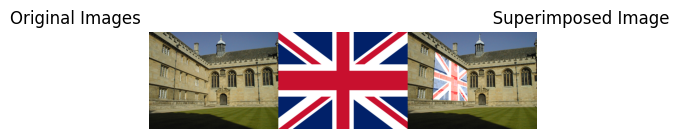

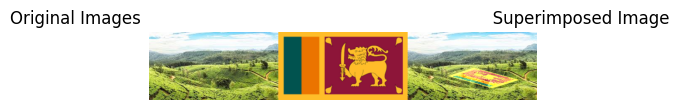

In [54]:
import cv2;import numpy as np;import matplotlib.pyplot as plt

def superimpose_images(image1, image2):
    image1 = cv2.imread(image1) ;image2 = cv2.imread(image2) ;points_img1 = []
    def select_points(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            points_img1.append([x, y]) ;temp_img = image1.copy()
            cv2.circle(temp_img, (x, y), 5, (0, 255, 0), -1) ;cv2.imshow("Select 4 Points", temp_img)

    cv2.imshow("Select 4 Points", image1) ;cv2.setMouseCallback("Select 4 Points", select_points)
    while len(points_img1) < 4:
        cv2.waitKey(1)
    cv2.destroyAllWindows()

    points_img1 = np.array(points_img1, dtype=np.float32)
    points_flag = np.float32([[0, 0], [image2.shape[1], 0], [image2.shape[1], image2.shape[0]], [0, image2.shape[0]]])
    H, _ = cv2.findHomography(points_flag, points_img1)
    warped_flag = cv2.warpPerspective(image2, H, (image1.shape[1], image1.shape[0]))
    combined_image = np.hstack((cv2.cvtColor(image1, cv2.COLOR_BGR2RGB),cv2.cvtColor(cv2.resize(image2, (image1.shape[1], image1.shape[0])), cv2.COLOR_BGR2RGB), cv2.cvtColor(cv2.add(image1, warped_flag), cv2.COLOR_BGR2RGB)))
    plt.figure(figsize=(5,3)) ;plt.imshow(combined_image) ;plt.title('Original Images                                                                   Superimposed Image ') ;plt.axis('off') ;plt.show()

superimpose_images('005.jpg', 'flag.png')
superimpose_images('tea.jpg','sl.png')

Question 4 

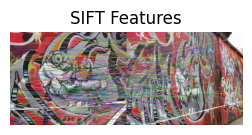

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('img1.ppm') ;img5 = cv2.imread('img5.ppm') ;sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None); kp5, des5 = sift.detectAndCompute(img5, None)
bf = cv2.BFMatcher(cv.NORM_L1, crossCheck=True) ;matches = sorted(bf.match(des1, des5), key = lambda x:x.distance)
img_matches = cv2.drawMatches(img1, kp1, img5, kp5, matches[:250], img5, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig, ax = plt.subplots(figsize=(3,3)); im = cv.cvtColor(img_matches, cv.COLOR_BGR2RGB)
ax.set_title("SIFT Features"), ax.imshow(im) ;plt.axis('off') ;plt.show()

Computed Homography  [[ 6.27203415e-01  4.07994063e-02  2.23469424e+02]
 [ 2.30677949e-01  1.13201801e+00 -2.28945243e+01]
 [ 5.06201231e-04 -8.99565310e-05  1.00000000e+00]]
Provided Homography     6.2544644e-01   5.7759174e-02   2.2201217e+02
   2.2240536e-01   1.1652147e+00  -2.5605611e+01
   4.9212545e-04  -3.6542424e-05   1.0000000e+00



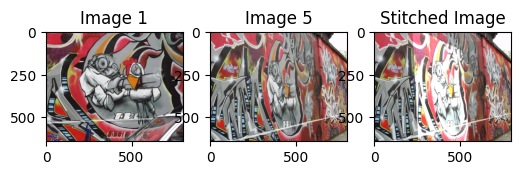

In [56]:
img2, img3, img4, img1, img5 = cv.imread("img2.ppm"), cv.imread("img3.ppm"), cv.imread("img4.ppm"), cv.imread("img1.ppm"), cv.imread("img5.ppm")
images = [cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cv.cvtColor(img2, cv.COLOR_BGR2GRAY), cv.cvtColor(img3, cv.COLOR_BGR2GRAY), cv.cvtColor(img4, cv.COLOR_BGR2GRAY), cv.cvtColor(img5, cv.COLOR_BGR2GRAY)]

def random_number(n, t):
    randn = np.random.randint(n, size=t); m = np.zeros(np.shape(randn))
    for i in range(len(randn)):
        m[i] = np.sum(randn==randn[i])
    if np.sum(m) == len(m):
        return randn
    else:
        return random_number(n,t)

def Homography(p1, p2):
    x1, y1, x2, y2, x3, y3, x4, y4 = p2[0], p2[1], p2[2], p2[3], p2[4], p2[5], p2[6], p2[7] 
    x1T, x2T, x3T, x4T = p1[0], p1[1], p1[2], p1[3]
    zero_matrix = np.array([[0], [0], [0]])
    A = np.concatenate((np.concatenate((zero_matrix.T,x1T, -y1*x1T), axis = 1), np.concatenate((x1T, zero_matrix.T, -x1*x1T), axis = 1),
                            np.concatenate((zero_matrix.T,x2T, -y2*x2T), axis = 1), np.concatenate((x2T, zero_matrix.T, -x2*x2T), axis = 1),
                            np.concatenate((zero_matrix.T,x3T, -y3*x3T), axis = 1), np.concatenate((x3T, zero_matrix.T, -x3*x3T), axis = 1),
                            np.concatenate((zero_matrix.T,x4T, -y4*x4T), axis = 1), np.concatenate((x4T, zero_matrix.T, -x4*x4T), axis = 1)), axis = 0, dtype=np.float64)
    W, v = np.linalg.eig(((A.T)@A)) ;temph= v[:,np.argmin(W)] ;H = temph.reshape((3,3))
    return H

p, s, e = 0.99, 4, 0.5 ;N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s)))) ;Hs = []
for i in range(4):
    sift = cv.SIFT_create()
    key_points_1, descriptors_1 = sift.detectAndCompute(images[i],None) ;key_points_2, descriptors_2 = sift.detectAndCompute(images[i+1],None)
    bf_match = cv.BFMatcher(cv.NORM_L1, crossCheck=True) ;matches = sorted(bf_match.match(descriptors_1, descriptors_2), key = lambda x:x.distance)
    Source_Points = [key_points_1[k.queryIdx].pt for k in matches] ; Destination_Points = [key_points_2[k.trainIdx].pt for k in matches]
    threshold, best_inliers, best_H = 2, 0, 0
    for i in range(N):
        ran_points = random_number(len(Source_Points)-1, 4) ;f_points = []
        for j in range(4):
            f_points.append(np.array([[Source_Points[ran_points[j]][0], Source_Points[ran_points[j]][1], 1]]))
        t_points = []
        for j in range(4):
            t_points.append(Destination_Points[ran_points[j]][0]) ;t_points.append(Destination_Points[ran_points[j]][1])
        H = Homography(f_points,t_points)
        inliers = 0 
        for k in range(len(Source_Points)):
            X = [Source_Points[k][0], Source_Points[k][1], 1] ; HX = H @ X ; HX /= HX[-1]
            err = np.sqrt(np.power(HX[0]-Destination_Points[k][0], 2) + np.power(HX[1]-Destination_Points[k][1], 2))
            if err < threshold:
                inliers +=1
        if inliers > best_inliers:
            best_inliers = inliers ;best_H = H 
    Hs.append(best_H)
H1_H5 = Hs[3] @ Hs[2] @ Hs[1] @ Hs[0] ; H1_H5 /= H1_H5[-1][-1]
print("Computed Homography ", H1_H5) ; print("Provided Homography ", open("H1to5p",'r').read())
final = cv.add(img5, cv.warpPerspective(img1, H1_H5, (np.shape(img5)[1], np.shape(img5)[0])))
fig, ax = plt.subplots(1,3,figsize=(6,6))
ax[0].imshow(cv.cvtColor(img1,cv.COLOR_BGR2RGB)), ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(img5,cv.COLOR_BGR2RGB)), ax[1].set_title("Image 5")
ax[2].imshow(cv.cvtColor(final,cv.COLOR_BGR2RGB)), ax[2].set_title("Stitched Image") ;plt.show()